In [28]:
import signac
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

project = signac.get_project(root='../')
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)
df.T

,01f140b02291f275141c64af52de5d72,5fc1a29d0e5c5f168afff2a9e5e66186,88e7e746fc6b54d29ec96321fe99bb94,e81db0400b1b65f2ea6ae3a60a5fdc0c,0d1028125b56e681018f35528f717395,a0e4368e849cca8f0cb4016953e1986d,a798a3709d0d02be3717d2d2da025eeb,ba1056c0cc83901508dee6f6d1b678d7
NPROCS,1,1,1,1,1,1,1,1
P,1,1,1,1,1,1,1,1
T,300,300,300,300,300,300,300,300
data_dump_interval,100,100,100,100,10,10,10,10
filter_group,"[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]"
job_type,traditional,plumed_ds_concurrent,plumed_sequential,plumed_ds_sequential,plumed_ds_sequential,plumed_sequential,traditional,plumed_ds_concurrent
output_type,xtc,xtc,xtc,xtc,xtc,xtc,xtc,xtc
simulation_time,2000,2000,2000,2000,2000,2000,2000,2000
trial,1,1,1,1,1,1,1,1
_status,{'a4md/01f140b0/initialize/0000/f4b1e5c2d2f257...,{'a4md/5fc1a29d/initialize/0000/f9229b7b8dd725...,{'a4md/88e7e746/initialize/0000/99098250e48a2e...,{'a4md/e81db040/initialize/0000/d6507a31d51f3d...,{'a4md/0d102812/initialize/0000/00b7153471030a...,{'a4md/a0e4368e/initialize/0000/ef99ee9569511c...,{'a4md/a798a370/initialize/0000/4529adc1915c59...,{'a4md/ba1056c0/initialize/0000/1ea3170f9da21e...


In [29]:
for jobid in df.index:
    job=project.open_job(id=jobid)
    
    if job.sp.job_type=='traditional':
        job.document['workflow_type'] = 'Workflow 1'
    elif job.sp.job_type=='plumed_sequential':
        job.document['workflow_type'] = 'Workflow 2'
    elif job.sp.job_type=='plumed_ds_sequential':
        job.document['workflow_type'] = 'Workflow 3'
    elif job.sp.job_type=='plumed_ds_concurrent':
        job.document['workflow_type'] = 'Workflow 4'

df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)

Text(17.194444444444443, 0.5, 'Total Time [s]')

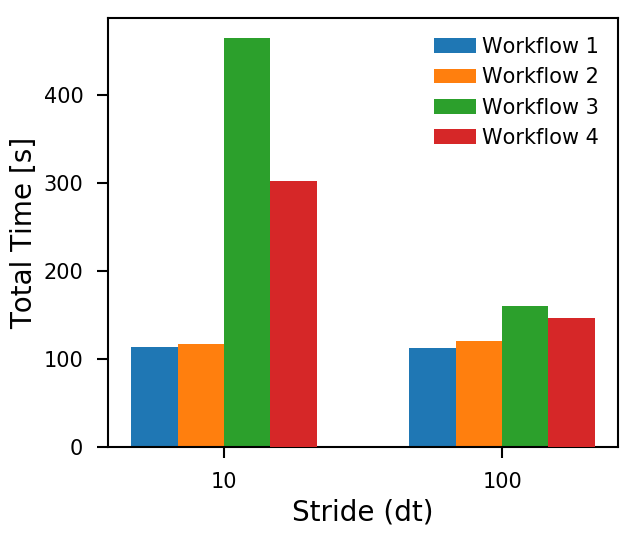

In [30]:
df_filtered = df#[(df.filter_group=='Protein_NA_bound')& (df.output_type=='xtc')]

for i,(job_type,df_job_type_grp) in enumerate(df_filtered.groupby('workflow_type')):
    dump_intervals = []
    a_times = []
    a_times_sem = []
    for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
        a_times.append(df_grp.total_time_s.mean())
        a_times_sem.append(df_grp.total_time_s.sem())
        dump_intervals.append(ddi)
        #print(a_times_sem)
    bar_width=100
    spacing = bar_width*6 # times the barwidth
    xvals = (np.arange(len(dump_intervals))+1)*(spacing)
    #print(xvals)
    if job_type=='Workflow 1':
        line_style='--'
        xvalues = xvals-1.5*bar_width
        legend = 'Workflow 1'
        #print(xvalues)
    elif job_type=='Workflow 2':
        line_style='-'
        xvalues = xvals-bar_width/2
        legend = 'Workflow 2'
    elif job_type=='Workflow 3':
        line_style='-'
        xvalues = xvals+bar_width/2
        legend = 'Workflow 3'
    elif job_type=='Workflow 4':
        line_style='-'
        xvalues = xvals+1.5*bar_width
        legend = 'Workflow 4'
        #print(xvalues)
    plt.bar(xvalues,
            a_times,
            yerr=a_times_sem,
            zorder=i,
            align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
            label=legend)#'{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
    plt.xticks(xvals,dump_intervals, fontsize=15)
    plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
#plt.ylim(0,400)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Stride (dt)', fontsize=20)
plt.ylabel('Total Time [s]', fontsize=20)

Text(17.194444444444443, 0.5, 'Simulation Time [s]')

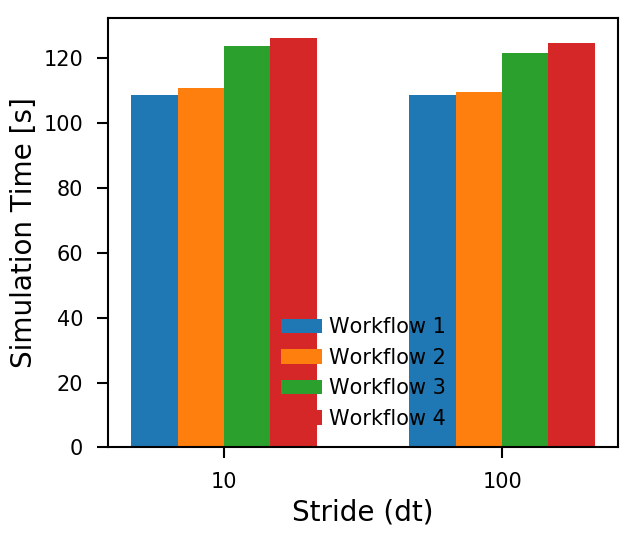

In [32]:
df_filtered = df#[(df.L==15)&(df.output_type=='dcd')]
for i,(job_type,df_job_type_grp) in enumerate(df_filtered.groupby('workflow_type')):
    dump_intervals = []
    a_times = []
    a_times_sem = []
    for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
        a_times.append(df_grp.simulation_time_s.mean())
        a_times_sem.append(df_grp.simulation_time_s.sem())
        dump_intervals.append(ddi)
        #print(a_times_sem)
    bar_width=100
    spacing = bar_width*6 # times the barwidth
    xvals = (np.arange(len(dump_intervals))+1)*(spacing)
    #print(xvals)
    if job_type=='Workflow 1':
        line_style='--'
        xvalues = xvals-1.5*bar_width
        legend = 'Workflow 1'
        #print(xvalues)
    elif job_type=='Workflow 2':
        line_style='-'
        xvalues = xvals-bar_width/2
        legend = 'Workflow 2'
    elif job_type=='Workflow 3':
        line_style='-'
        xvalues = xvals+bar_width/2
        legend = 'Workflow 3'
    elif job_type=='Workflow 4':
        line_style='-'
        xvalues = xvals+1.5*bar_width
        legend = 'Workflow 4'
        #print(xvalues)
    plt.bar(xvalues,
            a_times,
            yerr=a_times_sem,
            #zorder=i,
            align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
            label=legend)#'{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
    plt.xticks(xvals,dump_intervals, fontsize=15)
    plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
#plt.ylim(0,0.4)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Stride (dt)', fontsize=20)
plt.ylabel('Simulation Time [s]', fontsize=20)

Text(-29.305555555555557, 0.5, 'Analysis Time [s]')

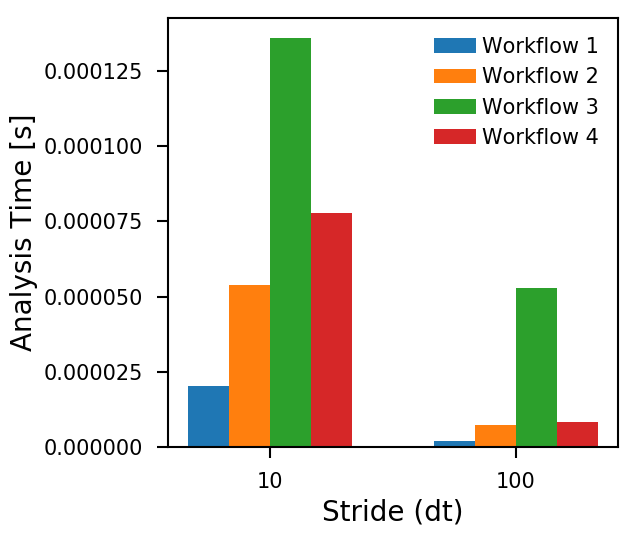

In [33]:
df_filtered = df#[(df.L==15)&(df.output_type=='dcd')]
for i,(job_type,df_job_type_grp) in enumerate(df_filtered.groupby('workflow_type')):
    dump_intervals = []
    a_times = []
    a_times_sem = []
    for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
        a_times.append(df_grp.analysis_time_s.mean())
        a_times_sem.append(df_grp.analysis_time_s.sem())
        dump_intervals.append(ddi)
        #print(a_times_sem)
    bar_width=100
    spacing = bar_width*6 # times the barwidth
    xvals = (np.arange(len(dump_intervals))+1)*(spacing)
    #print(xvals)
    if job_type=='Workflow 1':
        line_style='--'
        xvalues = xvals-1.5*bar_width
        legend = 'Workflow 1'
        #print(xvalues)
    elif job_type=='Workflow 2':
        line_style='-'
        xvalues = xvals-bar_width/2
        legend = 'Workflow 2'
    elif job_type=='Workflow 3':
        line_style='-'
        xvalues = xvals+bar_width/2
        legend = 'Workflow 3'
    elif job_type=='Workflow 4':
        line_style='-'
        xvalues = xvals+1.5*bar_width
        legend = 'Workflow 4'
        #print(xvalues)
    plt.bar(xvalues,
            a_times,
            yerr=a_times_sem,
            #zorder=i,
            align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
            label=legend)#'{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
    plt.xticks(xvals,dump_intervals, fontsize=15)
    plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
#plt.ylim(0,300)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Stride (dt)', fontsize=20)
plt.ylabel('Analysis Time [s]', fontsize=20)

Text(17.194444444444443, 0.5, 'Data Management Time [s]')

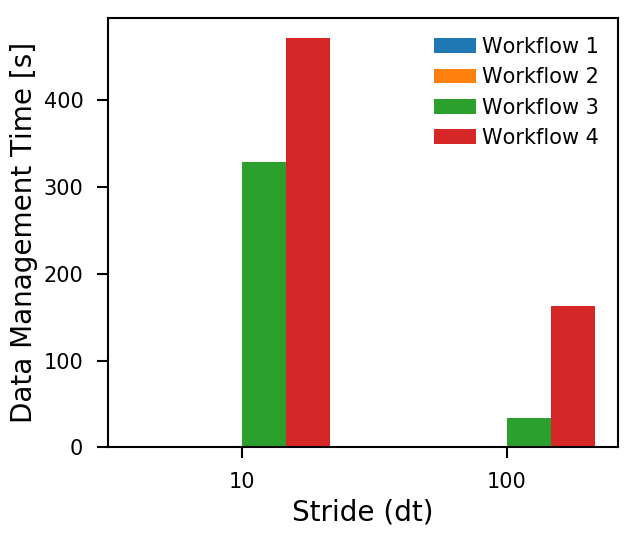

In [34]:
df_filtered = df#[(df.L==15)&(df.output_type=='dcd')]
for i,(job_type,df_job_type_grp) in enumerate(df_filtered.groupby('workflow_type')):
    dump_intervals = []
    a_times = []
    a_times_sem = []
    for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
        a_times.append(df_grp.data_management_time_s.mean())
        a_times_sem.append(df_grp.data_management_time_s.sem())
        
        dump_intervals.append(ddi)
        #print(a_times_sem)
    bar_width=100
    spacing = bar_width*6 # times the barwidth
    xvals = (np.arange(len(dump_intervals))+1)*(spacing)
    #print(xvals)
    if job_type=='Workflow 1':
        line_style='--'
        xvalues = xvals-2*bar_width
        legend = 'Workflow 1'
        #print(xvalues)
    elif job_type=='Workflow 2':
        line_style='-'
        xvalues = xvals-bar_width/2
        legend = 'Workflow 2'
    elif job_type=='Workflow 3':
        line_style='-'
        xvalues = xvals+bar_width/2
        legend = 'Workflow 3'
    elif job_type=='Workflow 4':
        line_style='-'
        xvalues = xvals+1.5*bar_width
        legend = 'Workflow 4'
        #print(xvalues)
    plt.bar(xvalues,
            a_times,
            yerr=a_times_sem,
            #zorder=i,
            align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
            label=legend)#'{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
    plt.xticks(xvals,dump_intervals, fontsize=15)
    plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
#plt.ylim(0,100)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Stride (dt)', fontsize=20)
plt.ylabel('Data Management Time [s]', fontsize=20)

Workflow 1
Workflow 2
Workflow 3
Workflow 4


Text(17.069444444444443, 0.5, 'Time [s]')

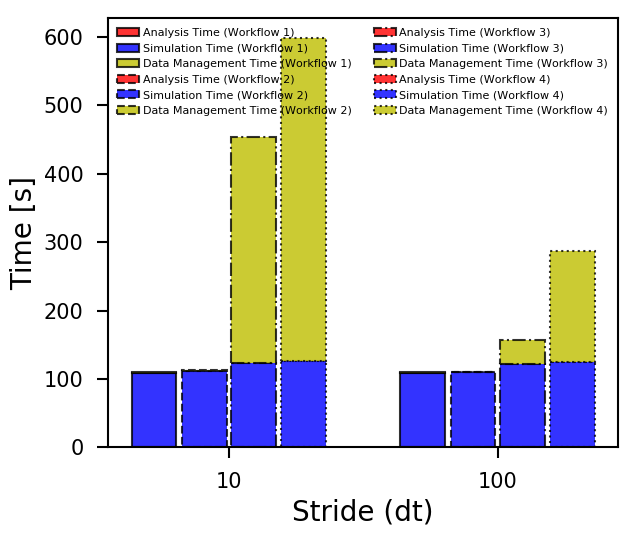

In [31]:
df_filtered = df#[(df.L==15)&(df.output_type=='dcd')]
for i,(job_type,df_job_type_grp) in enumerate(df_filtered.groupby('workflow_type')):
    print(job_type)
    dump_intervals = []
    s_times = []
    a_times = []
    t_times = []
    a_times_sem = []
    s_times_sem = []
    t_times_sem = []
    for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
        a_times.append(df_grp.analysis_time_s.mean())
        s_times.append(df_grp.simulation_time_s.mean())
        t_times.append(df_grp.data_management_time_s.mean())
        a_times_sem.append(df_grp.analysis_time_s.sem())
        s_times_sem.append(df_grp.simulation_time_s.sem())
        t_times_sem.append(df_grp.data_management_time_s.sem())
        dump_intervals.append(ddi)
        #print(a_times_sem)

    total_time = np.asarray(a_times)+np.asarray(s_times)+np.asarray(t_times)
    bar_width=100
    spacing = bar_width*6 # times the barwidth
    xvals = (np.arange(len(dump_intervals))+1)*(spacing)
    #print(xvals)
    if job_type=='Workflow 1':
        line_style='-'
        xvalues = xvals-(1.5*bar_width)-(bar_width*0.17)
        legend = 'Workflow 1'
        #print(xvalues)
    elif job_type=='Workflow 2':
        line_style='--'
        xvalues = xvals-(bar_width/2)-(bar_width*0.05)
        legend = 'Workflow 2'
    elif job_type=='Workflow 3':
        line_style='-.'
        xvalues = xvals+(bar_width/2)+(bar_width*0.05)
        legend = 'Workflow 3'
    elif job_type=='Workflow 4':
        line_style=':'
        xvalues = xvals+(1.5*bar_width)+(bar_width*0.17)
        legend = 'Workflow 4'
        #print(xvalues)


    #print('p0 get label',p0[0],p0[1],p0[2],p0[3],p0[4],p0[5])

    p1 = plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                color='r',
                 ls=line_style,
                 edgecolor='k',
                 lw=1.5,
                #zorder=0,
                align='center', alpha=0.8, ecolor='black', capsize=5, width=bar_width,
                label='{} ({})'.format('Analysis Time',str.title(legend)))#job_type.replace('_',' '))))

    p2 = plt.bar(xvalues,
                s_times,
                yerr=s_times_sem,
                bottom=a_times,
                color='b',
                 ls=line_style,
                 edgecolor='k',
                 lw=1.5,
                #zorder=0,
                align='center', alpha=0.8, ecolor='k', capsize=5, width=bar_width,
                label='{} ({})'.format('Simulation Time',str.title(legend)))#job_type.replace('_',' '))))

    p3 = plt.bar(xvalues,
                t_times,
                yerr=t_times_sem,
                bottom=np.asarray(a_times)+np.asarray(s_times),
                color='y',
                 ls=line_style,
                 edgecolor='k',
                 lw=1.5,
                #zorder=0,
                align='center', alpha=0.8, ecolor='black', capsize=5, width=bar_width,
                label='{} ({})'.format('Data Management Time',str.title(legend)))#job_type.replace('_',' '))))

    plt.xticks(xvals,dump_intervals, fontsize=15)
    plt.yticks(fontsize=15)

#plt.legend((p1[0], p2[0], p3[0]), ('Analysis Time', 'Simulation Time', 'Transfer Time'),fontsize=15)
plt.legend(fontsize=8,ncol=2)
plt.tight_layout()
#plt.ylim(0,300)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Stride (dt)', fontsize=20)
plt.ylabel('Time [s]', fontsize=20)